In [1]:
%load_ext autoreload
%autoreload 2

## Regolamento

Tempi e consegna:

* Il tempo disponibile per lo svoligimento della prova è di 2 ore
* Al termine, il file `sol/lorenz.py` deve essere caricato su [EOL](https://eol.unibo.it/)

Materiale consultabile:

* È possibile consultare liberamente il materiale sul [sito del corso](https://virtuale.unibo.it/)
* È possible utilizzare fogli bianchi e penna/matita
* Non è possibile consultare od utilizzare altro materiale

Domande ammissibili:

* Domande di comprensione del testo possono essere fatte liberamente
* Domande sulla soluzione degli esercizi non avranno risposta

Indicazioni sulla codifica e valutazione:

* Le interfacce (nomi di classe, funzioni, parametri) vanno rispettate alla lettera
* La valutazione sarà semi-automatizzata e prenderà in considerazione solo le funzioni/classi richieste dagli esercizi
* Si suggerisce comunque di collaudare opportunamento il codice prodotto, al fine di evitare errori
* Eventuale codice che non esegue riceverà una valutazione nulla o molto bassa

## Contesto

**Si consideri il sistema di Lorenz**

...uno dei più famosi esempi di sistemi dinamici che possono esibire comportamento caotico:

$$\begin{align}
\dot{x} & = \sigma (y - x) \\
\dot{y} &= x (\rho - z)  - y \\
\dot{z} &= xy - \beta z
\end{align}$$

Il sistema modella i moti convettivi di un fluido tra due termostati (basso/alto), in due dimensioni. La variabile $x$ è proporzionale alla velocità di convezione, $y$ alla variazione di temperatura orizzontale, e $z$ alla variazione di temperatura verticale.

## Esercizio 1

**Nel modulo `sol.lorenz` definire la classe:**

```python
class Dstate:
    def __init__(self, rho):
        self.rho = rho
    
    def __call__(self, X, t):
        # Parametri del problema
        sigma = 10
        beta = 8/3
        ...
```

* Il metodo `__call__` deve calcolare la funzione che definisce l'ODE
* Il parametro $\rho$ è passato per argomento al momento della costruzione, mentre $\sigma$ e $\beta$ sono specificati nel codice
* Il metodo deve restituire un array `numpy` con le componenti della derivata


**Nel modulo `sol.lorenz` si definisca quindi la funzione:**

```python
def simulate(rho):
    X0 = [8, 8, 25]
    t = np.linspace(0, 60, 60 * 10)
    ...
```

* La funzione riceve come argomento il valore di $\rho$
* La funzione deve risolvere un problema ai valori iniziali, utilizzando lo stato iniziale ed il vettore dei valori di tempo specificati nel codice
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione per $\rho = 28$. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

Si tenga presente che, per i parametri considerati, il sistema ha un comportamento caotico

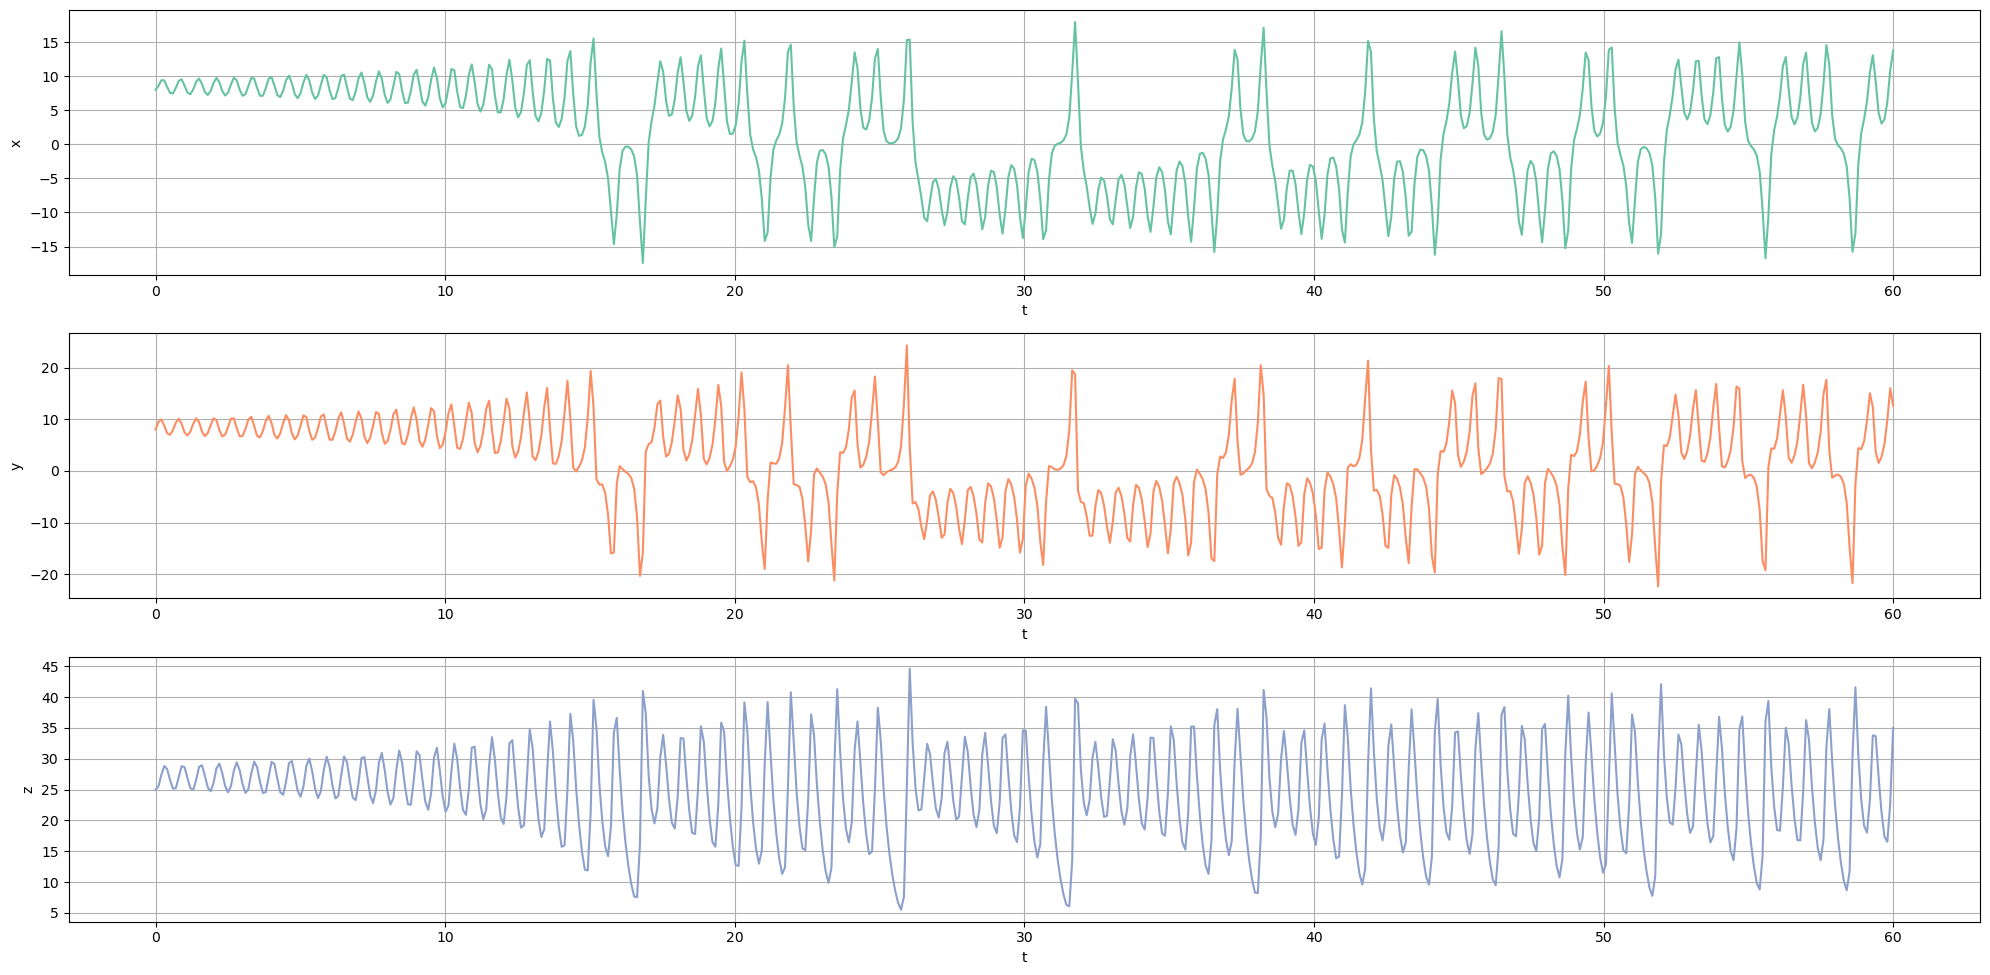

In [4]:
from sol import lorenz
from base import util

X, t = lorenz.simulate(rho=28)
util.plot_state_evolution(X, t, xlabel='t', ylabels=['x', 'y', 'z'], figsize=(20, 10))

## Esercizio 2

**Si determinino i valori di x, y e z all’equilibrio**

...risolvendo il sistema derivato dell’imposizione della condizione:

$$
F(X) =
\left(\begin{array}{c}
\dot{x} \\
\dot{y} \\
\dot{z}
\end{array}\right)
=
\left(\begin{array}{c}
0 \\
0 \\
0
\end{array}\right)$$


**A tal fine, nel modulo `sol.lorenz` si definisca la funzione:**


```python
def find_eq_aux(X):
    # Parametri del problema
    sigma = 10
    beta = 8/3
    rho = 28
    ...
```

* La funzione deve calcolare e restituire il valore di $F(X)$, come definita nell'introduzione dell'esercizio

**Nel modulo `sol.lorenz` si definisca la funzione:**

```python
def find_eq():
    X0 = [8, 8, 25]
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.fsolve` per determinare il punto di equilibrio
* La funzione deve valutare la convergenza di `fsolve`. In particolare, sia $X^*$ il vettore restituito da `fsolve`:
  - Se $\max(\text{abs}(F(X^*))) \leq 10^{-6}$ si considera la soluzione valida. In questo caso la funzione deve restituire la soluzione trovata
  - Altrimenti, la convergenza si considera non raggiunta. In questo caso la funzione deve restituire `None`

In [5]:
from sol import lorenz
from base import util

Xsol = lorenz.find_eq()
if Xsol is None:
    print('Nessuna soluzione trovata')
else:
    print(f'x = {Xsol[0]:.2f}, y = {Xsol[1]:.2f}, z = {Xsol[2]:.2f}')

x = 8.49, y = 8.49, z = 27.00


## Esercizio 3

**Si determini (mediante metodi numerici) quale valore dovrebbe assumere $\rho$ affinché il valore di z all’equilibrio sia 25**

...Ossia perché sia soddifatta la condizione:

$$
F_2(\tilde{X}) =
\left(\begin{array}{c}
\sigma (y - x) \\
x (\rho - z)  - y \\
xy - z \beta
\end{array}\right)
=
\left(\begin{array}{c}
0 \\
0 \\
0
\end{array}\right)
$$

Dove $\tilde{X} = (x, y, \rho)$ e $z = 25$.


**Nel modulo `sol.lorenz` si definisca la funzione:**

```python
def find_rho_aux(Xt):
    ...
```

* La funzione deve calcolare il valore di $F_2(\tilde{X})$, assumendo che $\sigma$ e $\beta$ abbiano i valori specificati nell'esercizio 1
* Si tenti di implementare la funzione riutilizzando quanto più possibile il codice sviluppato all'esercizio 1: questa condizione è necessaria per conferire punteggio massimo, ma sarano valutate anche soluzioni che utilizzino metodi diversi.

**Nel modulo `sol.lorenz` si definisca la funzione:**

```python
def find_rho():
    X0 = [8, 8, 25]
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.fsolve` per determinare il valore di $x, y, \rho$
* La funzione deve valutare la convergenza di `fsolve`. In particolare, sia $\tilde{X}^*$ il vettore restituito da `fsolve`:
  - Se $\max(\text{abs}(F_2(\tilde{X}^*))) \leq 10^{-6}$ si considera la soluzione valida. In questo caso la funzione deve restituire la soluzione trovata
  - Altrimenti, la convergenza si considera non raggiunta. In questo caso la funzione deve restituire `None`

In [6]:
Xsolt = lorenz.find_rho()
if Xsolt is None:
    print('Nessuna soluzione trovata')
else:
    print(f'x = {Xsolt[0]:.2f}, y = {Xsolt[1]:.2f}, rho = {Xsolt[2]:.2f}')

x = 8.16, y = 8.16, rho = 26.00
